# Regresión Random Forest

## Importar las librerías

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

## Importar el conjunto de datos

In [17]:
datos = pd.read_csv('aoe_data_clean.csv')
datos.head()


,map,duration,elo,p1_civ,p2_civ,winner
0,3,3445,1104.0,38,25,0
1,5,2932,884.5,3,13,0
2,5,2573,905.5,9,24,0
3,3,851,1080.0,25,22,1
4,3,4737,1050.0,1,32,1


In [18]:
X = datos.iloc[:, 1:-1].values
y_actual = datos.iloc[:, -1].values

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_actual, test_size=0.2, random_state=0)

In [20]:

regresor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regresor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predicción de un nuevo resultado

In [21]:
# Make predictions on the test data
y_pred = regresor.predict(X_test)

In [22]:
# Convert predicted values to binary (0 or 1) using a threshold
threshold = 0.5
y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [23]:
# Calculate TP, TN, FP, FN
TP = np.sum(np.logical_and(y_pred_binary == 1, y_test == 1))
TN = np.sum(np.logical_and(y_pred_binary == 0, y_test == 0))
FP = np.sum(np.logical_and(y_pred_binary == 1, y_test == 0))
FN = np.sum(np.logical_and(y_pred_binary == 0, y_test == 1))

In [24]:
# Calculate percentages
TP_percentage = TP / len(y_test) * 100
TN_percentage = TN / len(y_test) * 100

ValueError: x and y must be the same size

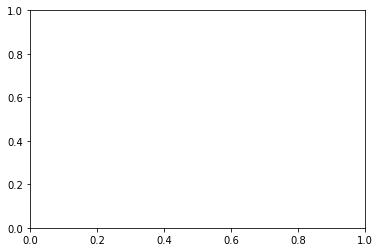

In [25]:
# Plotting the predicted values and the actual values
plt.plot(range(len(y_test)), y_test, color='red', label='Actual')
plt.plot(range(len(y_test)), y_pred, color='green', label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

In [ ]:

print("True Positive Percentage: {:.2f}%".format(TP_percentage))
print("True Negative Percentage: {:.2f}%".format(TN_percentage))